# Importing

In [1]:
import pandas as pd
import numpy as np
import ipyvolume as ipv
import matplotlib.pyplot as plt
from matplotlib import cm

data = pd.read_csv('./ex1data1.txt', header=None).values
x, y = data[:, :-1], data[:, -1:]
m = len(x)

print("x.shape is %s" % (x.shape,))
print("y.shape is %s" % (y.shape,))

x.shape is (97, 1)
y.shape is (97, 1)


# Plotting

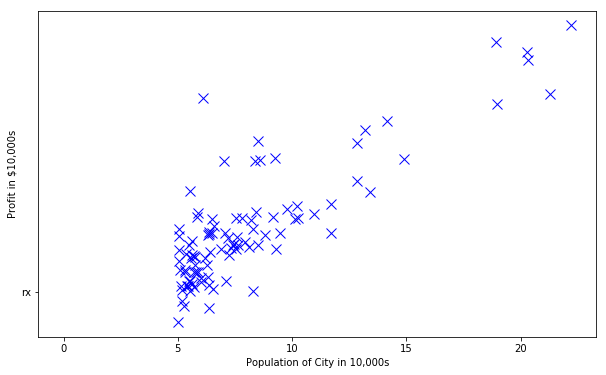

In [2]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'bx', 'rx',markersize=10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

# Vectorising the hypothesis function

In [3]:
# The original hypothesis function is of the form:
# theta0 + theta1 * x1 + theta2 * x2 ...

# We create a new column in our data for a new variable x0 that will allow us to model the cost function:
# theta0 * x0 + theta1 * x1 + theta2 * x2 ...
# Each value of x0 will take the value of 1 so that theta0 * x0 = theta0

x = np.hstack((np.ones((m, 1)), x))

# x is now of shape (97 rows, 2 column)
# theta is of shape (2 rows, 1 column)

# We can now vectorise the hypothesis function:
# theta0 * x0 + theta1 * x1 + theta2 * x2 ... = x * theta
# x * theta is of shape (rows of x, columns of theta) = (97 rows, 1 column)

# Cost Function

In [4]:
def half_mse(x, y, theta):
    return 1/(2 * m) * np.sum(np.square(x @ theta - y))

# Visualising the cost function

In [5]:
# f(t0, t1) -> (t0, t1, cost(t0, t1))
X = np.arange(-10,10,.5)
Y = np.arange(-1,4,.1)
X, Y = np.meshgrid(X, Y)
Z = np.zeros(X.shape)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = half_mse(x, y, np.array([[X[i][j]], [Y[i][j]]]))
        
        
colormap = cm.coolwarm
znorm = Z - Z.min()
znorm /= znorm.ptp()
znorm.min(), znorm.max()
color = colormap(znorm)

ipv.figure(figsize=(10,6))
ipv.plot_wireframe(X, Z, Y, color=color[...,:3])
ipv.xlabel("𝜃0")
ipv.zlabel("𝜃1")
ipv.ylabel("Cost")

ipv.show()

def set_view(figure, framenr, fraction):
    ipv.view(fraction*360, 0, distance=2.5)
    (2+0.5*np.sin(fraction * 6 * np.pi))
    
ipv.movie('cost.gif', set_view, fps=6, frames=24*2)

Output()


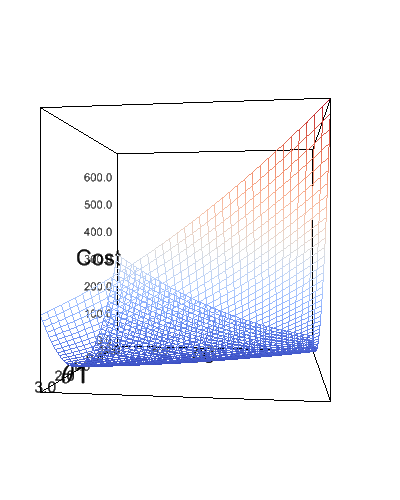

In [6]:
# include the gif with base64 encoding
import IPython.display
import base64
with open('cost.gif', 'rb') as gif:
    url = b"data:image/gif;base64," +base64.b64encode(gif.read())
IPython.display.Image(url=url.decode('ascii'))

# Feature normalisation

In [7]:
# Remove x0
x = x[:, 1:]

# Normalise x1, x2, ...
def feature_normalisation(x):
    mu = np.mean(x);
    sigma = np.std(x);
    return [(x - mu) / sigma, mu, sigma]

x, mu, sigma = feature_normalisation(x)

# Add x0
x = np.hstack((np.ones((m, 1)), x))


# Visualising the cost function

In [8]:
# f(t0, t1) -> (t0, t1, cost(t0, t1))
X = np.arange(5.83913505 - 6, 5.83913505 + 6,.2)
Y = np.arange(4.59304113 - 6, 4.59304113 + 6,.2)
X, Y = np.meshgrid(X, Y)
Z = np.zeros(X.shape)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = half_mse(x, y, np.array([[X[i][j]], [Y[i][j]]]))
        
        
colormap = cm.coolwarm
znorm = Z - Z.min()
znorm /= znorm.ptp()
znorm.min(), znorm.max()
color = colormap(znorm)

ipv.figure(figsize=(10,6))
ipv.plot_wireframe(X, Z, Y, color=color[...,:3])
ipv.xlabel("𝜃0")
ipv.zlabel("𝜃1")
ipv.ylabel("Cost")

ipv.show()

def set_view(figure, framenr, fraction):
    ipv.view(fraction*360, 0, distance=2.5)
    (2+0.5*np.sin(fraction * 6 * np.pi))
ipv.movie('cost_normalised.gif', set_view, fps=6, frames=24*2)

Output()


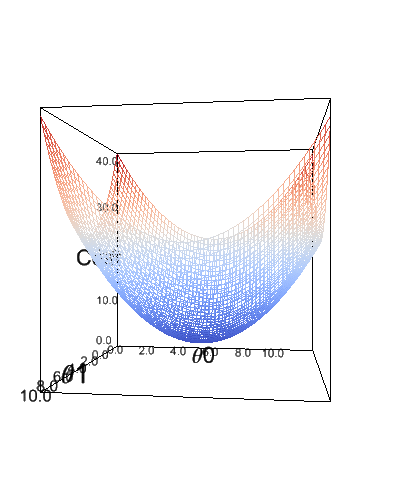

In [9]:
# include the gif with base64 encoding
import IPython.display
import base64
with open('cost_normalised.gif', 'rb') as gif:
    url = b"data:image/gif;base64," +base64.b64encode(gif.read())
IPython.display.Image(url=url.decode('ascii'))

# Gradient Descent

In [10]:
def gradient_descent(x, y, theta, alpha, iterations):
    h = []
    h.append(theta)
    for i in range(iterations):
        theta = theta - alpha / m * x.T @ (x @ theta - y)
        h.append(theta)
    return [theta, h]

In [11]:
# Initialise theta0, theta1, ...
theta = np.zeros((2, 1));

# Set the parameters of gradient descent
iterations = 500
alpha = 0.01

# Run gradient descent
theta, history = gradient_descent(x, y, theta, alpha, iterations)
print(theta)

[[5.80076911]
 [4.56286263]]


# Plotting gradient descent

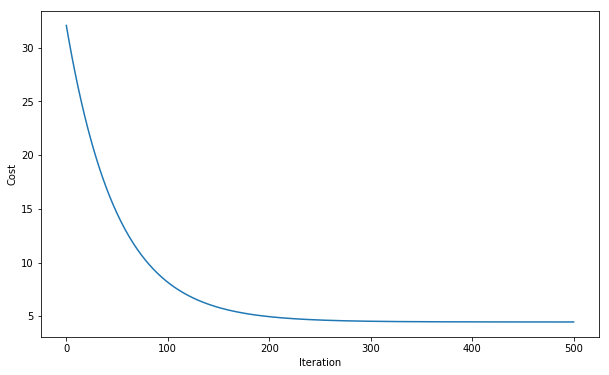

In [12]:
history = np.array(history).squeeze()
Z = np.array([half_mse(x, y, np.array([[u], [v]])) for u, v in zip(history[:, 0], history[:, 1])])
plt.figure(figsize=(10,6))
plt.plot(Z, '-',markersize=10)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()

# Visualising gradient descent

In [14]:
# f(t0, t1) -> (t0, t1, cost(t0, t1))
X = np.arange(5.83913505 - 6, 5.83913505 + 6,.2)
Y = np.arange(4.59304113 - 6, 4.59304113 + 6,.2)
X, Y = np.meshgrid(X, Y)
Z = np.zeros(X.shape)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = half_mse(x, y, np.array([[X[i][j]], [Y[i][j]]]))
        
        
colormap = cm.coolwarm
znorm = Z - Z.min()
znorm /= znorm.ptp()
znorm.min(), znorm.max()
color = colormap(znorm)

ipv.figure(figsize=(10,6))
ipv.plot_wireframe(X, Z, Y, color=color[...,:3])
ipv.xlabel("𝜃0")
ipv.zlabel("𝜃1")
ipv.ylabel("Cost")

U = history[:, 0]
V = history[:, 1]
Z = np.array([half_mse(x, y, np.array([[u], [v]])) for u, v in zip(U, V)])

s = ipv.scatter(U[:, np.newaxis], Z[:, np.newaxis], V[:, np.newaxis], marker='sphere', size=5)
ipv.animation_control(s, interval=50)

ipv.show()

def set_view(figure, framenr, fraction):
    ipv.view(fraction*360, 0, distance=2.5)
    (2+0.5*np.sin(fraction * 6 * np.pi))
ipv.movie('gradient_descent.gif', set_view, fps=6, frames=24*2)

Output()


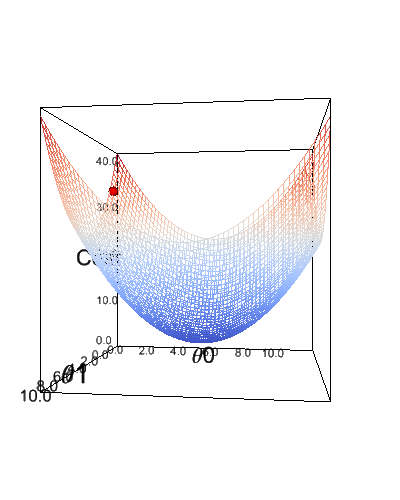

In [15]:
# include the gif with base64 encoding
import IPython.display
import base64
with open('gradient_descent.gif', 'rb') as gif:
    url = b"data:image/gif;base64," +base64.b64encode(gif.read())
IPython.display.Image(url=url.decode('ascii'))

# Plotting the hypothesis function

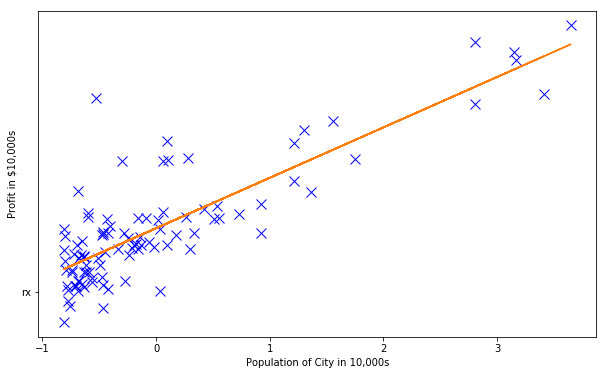

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x[:, 1], y, 'bx', 'rx',markersize=10)
plt.plot(x[:, 1], x @ theta, '-')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()